In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mainDF = pd.read_csv('rawData.csv')
mainDF

,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore,homePosition,homePercentage,awayPosition,awayPercentage
0,2012R0101,2012,1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,"38,203",...,Sydney,4.1,8.40,13.80,14.16,100,18.0,37.0,1.0,270.3
1,2012R0102,2012,1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,"78,285",...,Carlton,3.2,8.70,11.13,18.17,125,15.0,64.8,4.0,154.3
2,2012R0103,2012,1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,"78,466",...,Collingwood,2.7,7.90,12.16,16.19,115,6.0,119.1,13.0,83.9
3,2012R0104,2012,1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,"33,473",...,Brisbane Lions,1.4,7.80,13.13,17.17,119,14.0,65.5,5.0,152.6
4,2012R0105,2012,1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,"12,790",...,Adelaide,7.8,11.10,15.16,19.23,137,17.0,49.6,2.0,201.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2023SF01,2023,-3,2023-09-15,24.5,14.4,0.0,M.C.G.,7:50 PM,"96,412",...,Carlton,2.2,5.30,7.50,11.70,73,NaN,NaN,NaN,NaN
2443,2023SF02,2023,-3,2023-09-16,24.0,7.6,0.0,Adelaide Oval,7:10 PM,"45,520",...,Greater Western Sydney,4.4,9.11,11.15,13.15,93,NaN,NaN,NaN,NaN
2444,2023PF01,2023,-2,2023-09-22,15.3,5.7,0.0,M.C.G.,7:50 PM,"97,665",...,Greater Western Sydney,0.3,4.40,6.90,8.90,57,NaN,NaN,NaN,NaN
2445,2023PF02,2023,-2,2023-09-23,24.1,14.2,0.0,Gabba,5:15 PM,"36,012",...,Carlton,5.1,6.30,6.70,9.90,63,NaN,NaN,NaN,NaN


C:\Users\raadr\AppData\Local\Temp\ipykernel_45472\1671182766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['homePosition'], y=mainDF['Attendance'], palette='pastel')


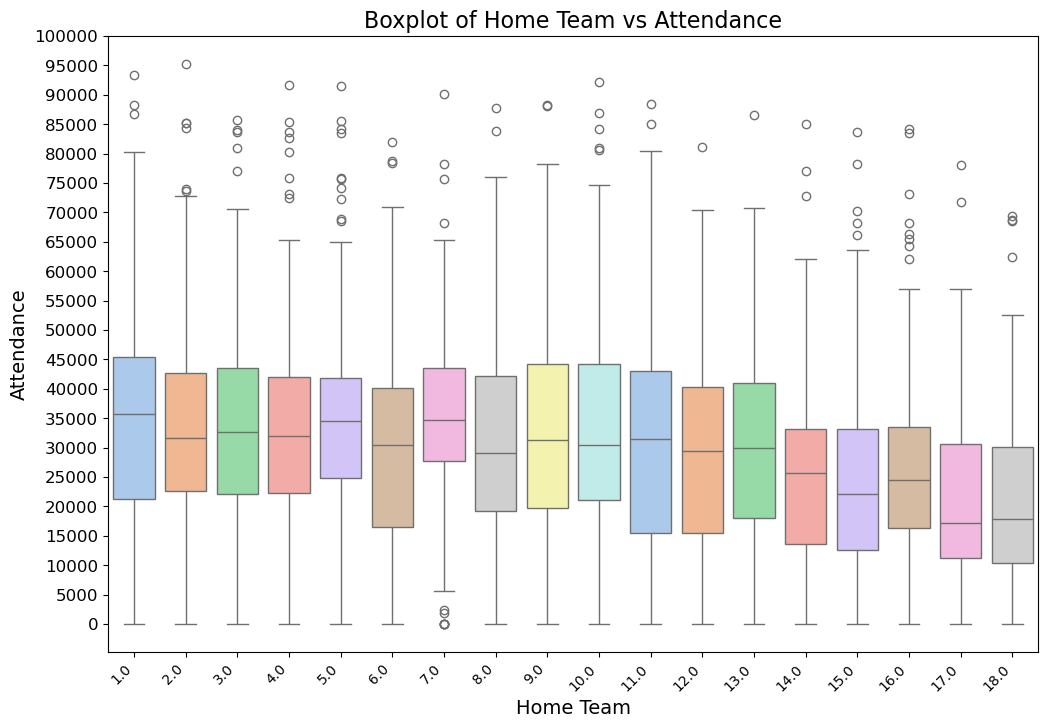

In [6]:

mainDF['Attendance'] = mainDF['Attendance'].str.replace(',', '', regex=True)  # Remove commas
mainDF['Attendance'] = pd.to_numeric(mainDF['Attendance'], errors='coerce') 

# Boxplot of Home Team vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['homePosition'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Home Team vs Attendance', fontsize=16)
plt.xlabel('Home Team', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


C:\Users\raadr\AppData\Local\Temp\ipykernel_45472\2645365776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Venue'], y=mainDF['Attendance'], palette='pastel')


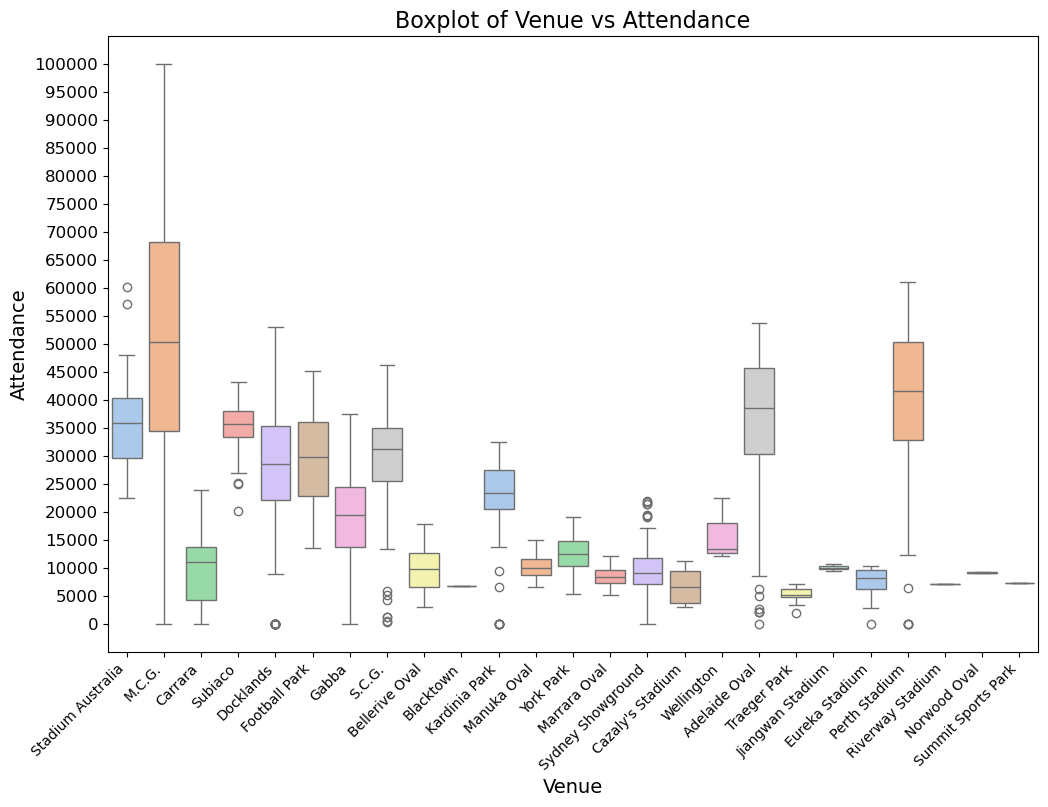

In [7]:
# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Venue'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Venue vs Attendance', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


## Attendance

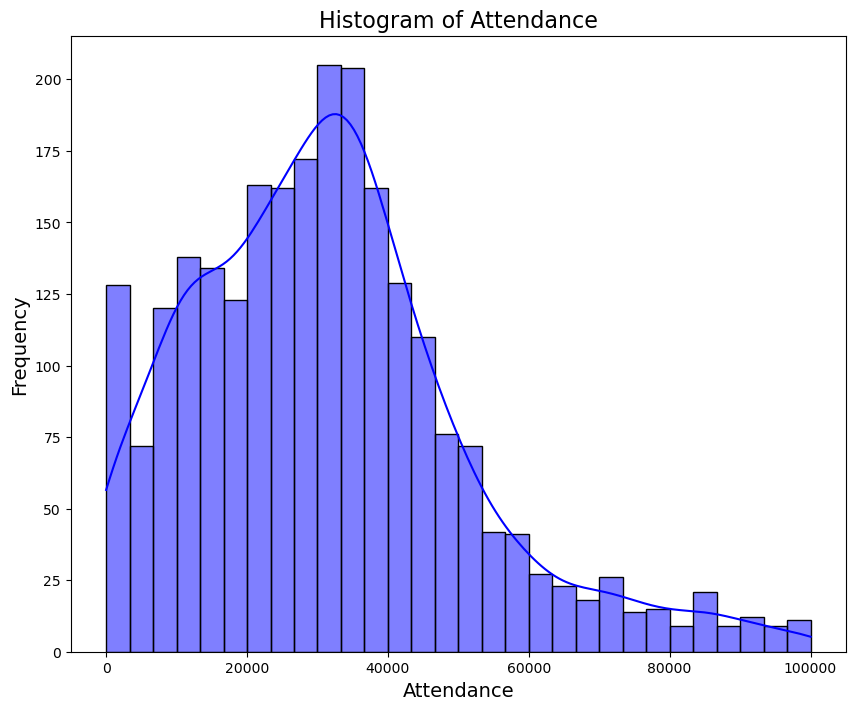

In [8]:
plt.figure(figsize=(10, 8))
sns.histplot(mainDF['Attendance'], bins=30, kde=True, color='blue')

plt.title('Histogram of Attendance', fontsize=16)
plt.xlabel('Attendance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

C:\Users\raadr\AppData\Local\Temp\ipykernel_45472\496554238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Year'], y=mainDF['Attendance'], palette='pastel')


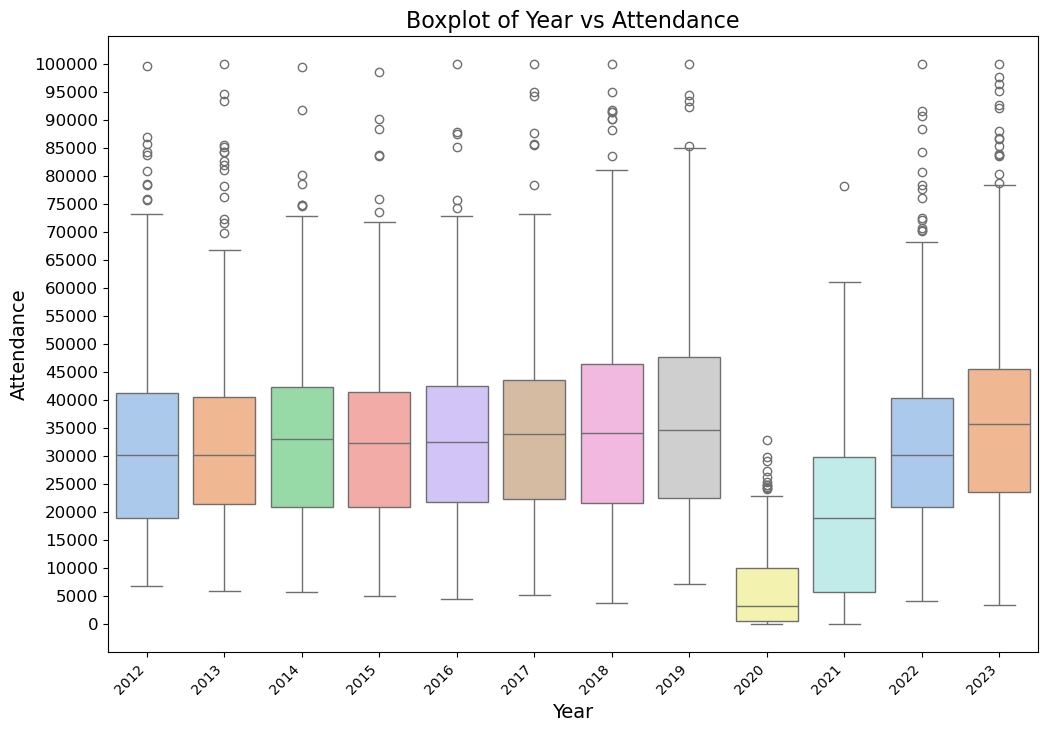

In [9]:
# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Year'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Year vs Attendance', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()

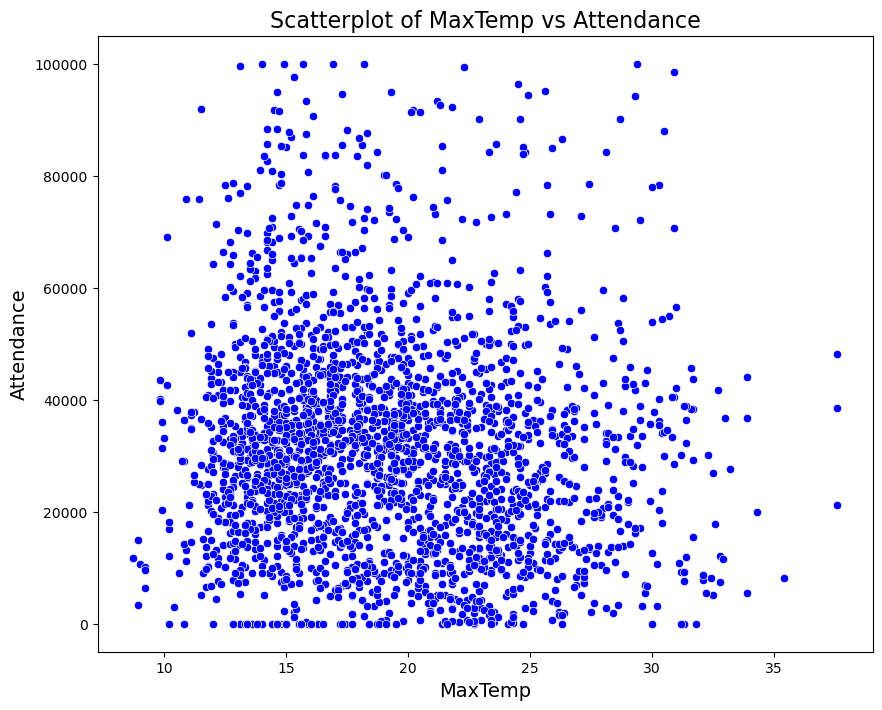

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = mainDF, x='MaxTemp', y='Attendance', color='blue')

plt.title('Scatterplot of MaxTemp vs Attendance', fontsize=16)
plt.xlabel('MaxTemp', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

plt.show()

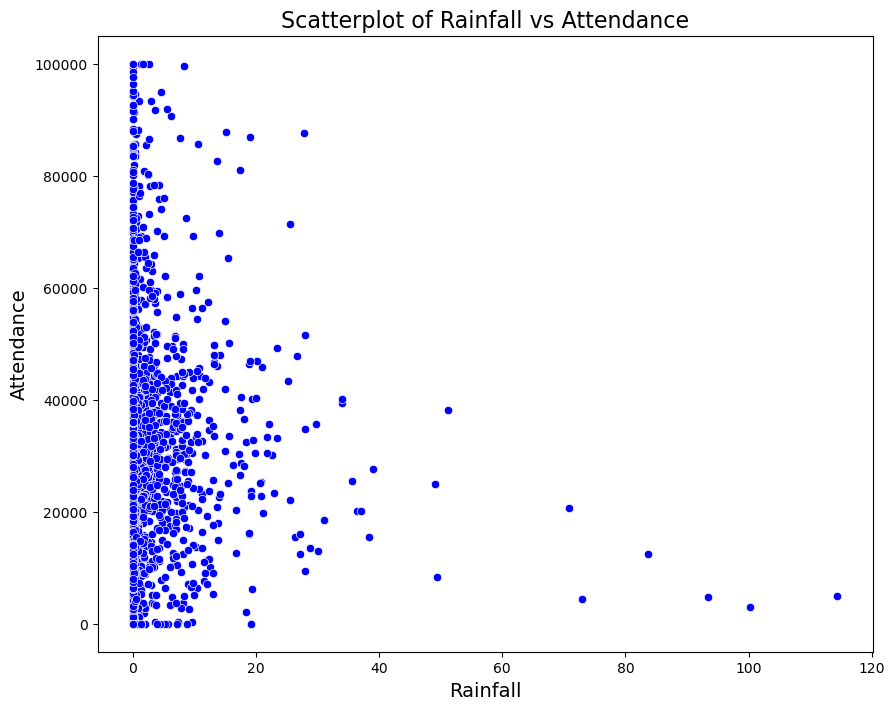

In [16]:
#Rainfall
plt.figure(figsize=(10, 8))
sns.scatterplot(data = mainDF, x='Rainfall', y='Attendance', color='blue')

plt.title('Scatterplot of Rainfall vs Attendance', fontsize=16)
plt.xlabel('Rainfall', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

plt.show()

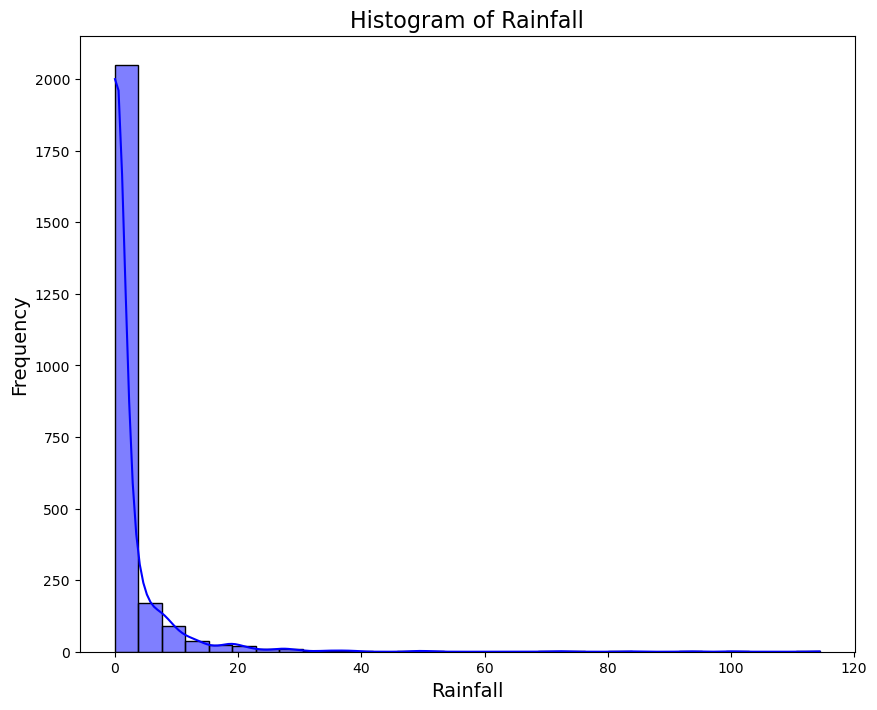

In [23]:
plt.figure(figsize=(10, 8))
sns.histplot(mainDF['Rainfall'], bins=30, kde=True, color='blue')

plt.title('Histogram of Rainfall', fontsize=16)
plt.xlabel('Rainfall', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

C:\Users\raadr\AppData\Local\Temp\ipykernel_45472\635418001.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['RainfallCategory'], y=mainDF['Attendance'], palette='pastel')


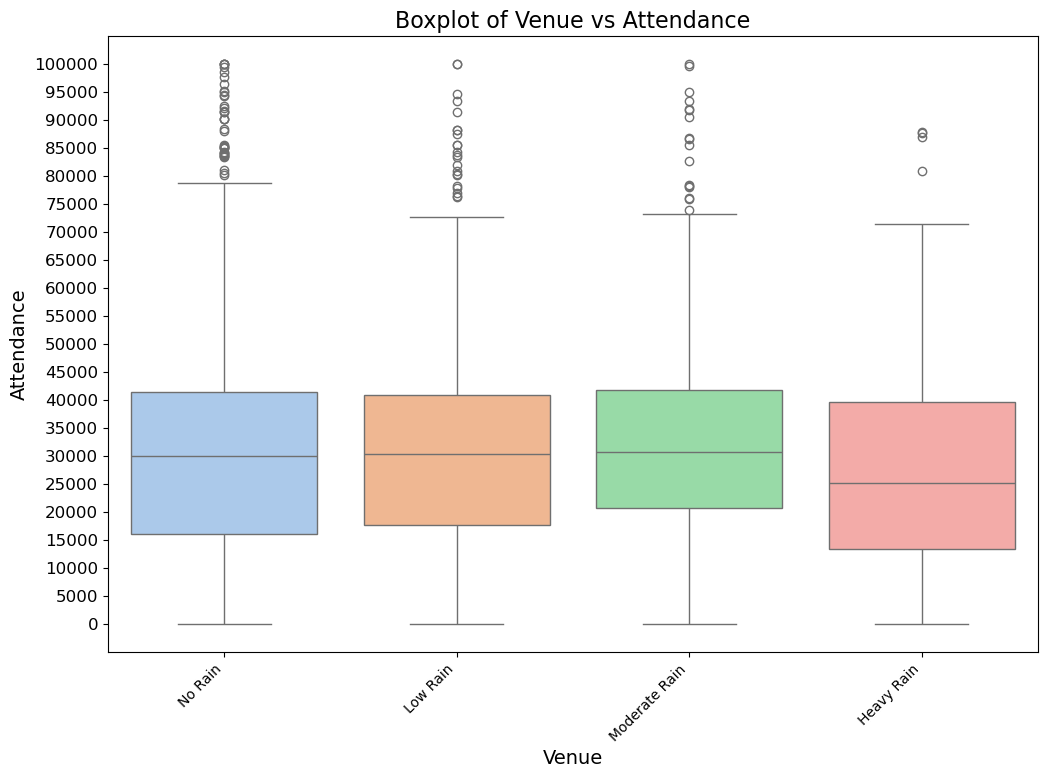

In [24]:
# Categorize Rainfall
def categorize_rainfall(rainfall):
    if rainfall == 0:
        return 'No Rain'
    elif rainfall > 0 and rainfall <= 2.5:
        return 'Low Rain'
    elif rainfall > 2.5 and rainfall <= 15:
        return 'Moderate Rain'
    else:
        return 'Heavy Rain'

mainDF['RainfallCategory'] = mainDF['Rainfall'].apply(categorize_rainfall)

# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['RainfallCategory'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Venue vs Attendance', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()


In [12]:
venue_count = mainDF['Venue'].value_counts()
print(venue_count)

Venue
M.C.G.                559
Docklands             511
Adelaide Oval         232
Gabba                 162
Carrara               157
Subiaco               140
Perth Stadium         135
S.C.G.                120
Kardinia Park          95
Sydney Showground      93
York Park              48
Football Park          46
Bellerive Oval         36
Manuka Oval            33
Stadium Australia      19
Marrara Oval           16
Cazaly's Stadium       13
Eureka Stadium         12
Traeger Park            9
Wellington              3
Jiangwan Stadium        3
Norwood Oval            2
Blacktown               1
Riverway Stadium        1
Summit Sports Park      1
Name: count, dtype: int64


C:\Users\raadr\AppData\Local\Temp\ipykernel_45472\1790040750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mainDF['Round'], y=mainDF['Attendance'], palette='pastel')


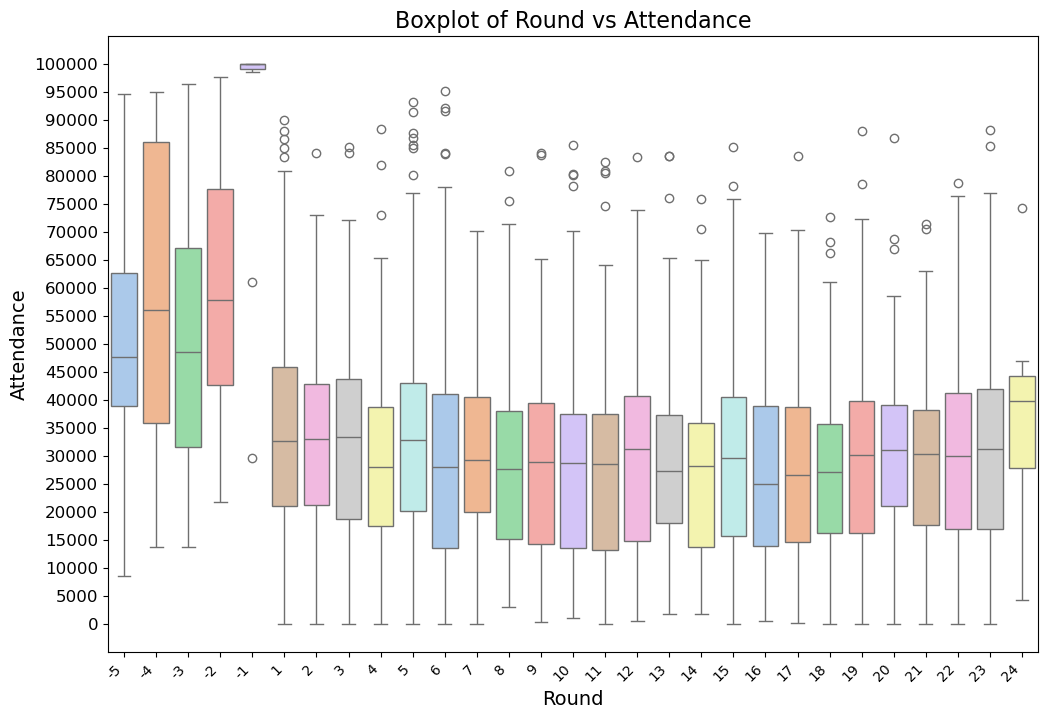

In [13]:
# Boxplot of Stadium vs Attendance
plt.figure(figsize=(12, 8))
sns.boxplot(x=mainDF['Round'], y=mainDF['Attendance'], palette='pastel')

plt.title('Boxplot of Round vs Attendance', fontsize=16)
plt.xlabel('Round', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='right')

# Dynamically set y-axis ticks
max_attendance = mainDF['Attendance'].max()
plt.yticks(range(0, int(max_attendance) + 1, 5000), fontsize=12)

# Show the plot
plt.show()